**Confidence Interval and CLT**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

import statistics

df=pd.read_csv('/content/original_walmart_data.csv_1641285094.txt')
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
#unique counts in each column#
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Observations:

* There are 5891 unique users in the dataset
* There are 3631 product_IDs of which P00265242 stands at first place with highest frequency
* Around 75% of customers are males and 59% are unmarried
* There are 7 bins under age out of which 26-35 is the most appearing, 21 different occupations(occupation no. 4 is at top frequency) and 3 different citi categories(category B is highest)
* There are 20 different product categories in the dataset
* Purchase may have outliers

In [ ]:
#sum of null values in each column---- No null values in the dataset#
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
#Changing data types of - Marital_Status, Occupation, Product_Category#
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
#Percentage calculations for all categorical variables#
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

Observations:

**AGE**: around 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

**CITY_CATEGORY**: city A:27%, B:42%, C:31%

**GENDER**: 75% of the users are Male and 25% are Female

**MARITAL-STATUS**: 60% Single, 40% Married

**OCCUPATION**: There are 20 differnent types of occupations in the city

**PRODUCT_CATEGORY**: Total of 20 product categories are there

**Stay_In_Current_City_Years**: 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years



In [ ]:
#Checking the age group distribution in different city categories
pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


In [ ]:
#Checking how genders are contributing towards toatl purchase amount
df2=pd.DataFrame(df.groupby(['Gender'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


In [ ]:
# Users with highest number of purchases
df.groupby(['User_ID'])['Purchase'].count().nlargest(10)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [ ]:
#Users with highest purchases amount
df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

 The users with high number of purchases contribute more to the purchase amount. Also, the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680) with top purchase count.

In [ ]:
#Occupations like 0, 4, 7 has contributed more towards total purchase amount.#
df2=pd.DataFrame(df.groupby(['Occupation'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


**Univariate Analysis**

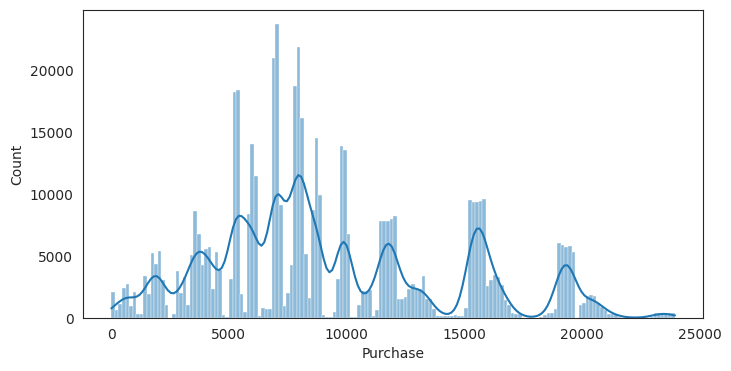

In [ ]:
#Purchase values between 5000 and 10000 have higher count. There are outliers in the data#
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Purchase", kde=True)
plt.show()

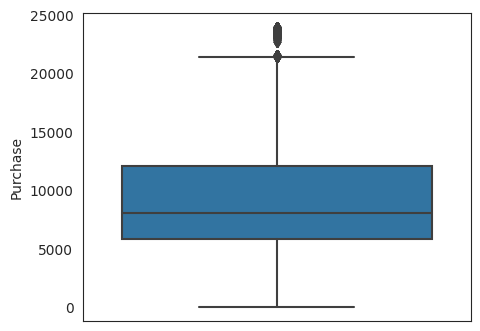

In [ ]:
#outliers in Purchase column#
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='Purchase')
plt.show()

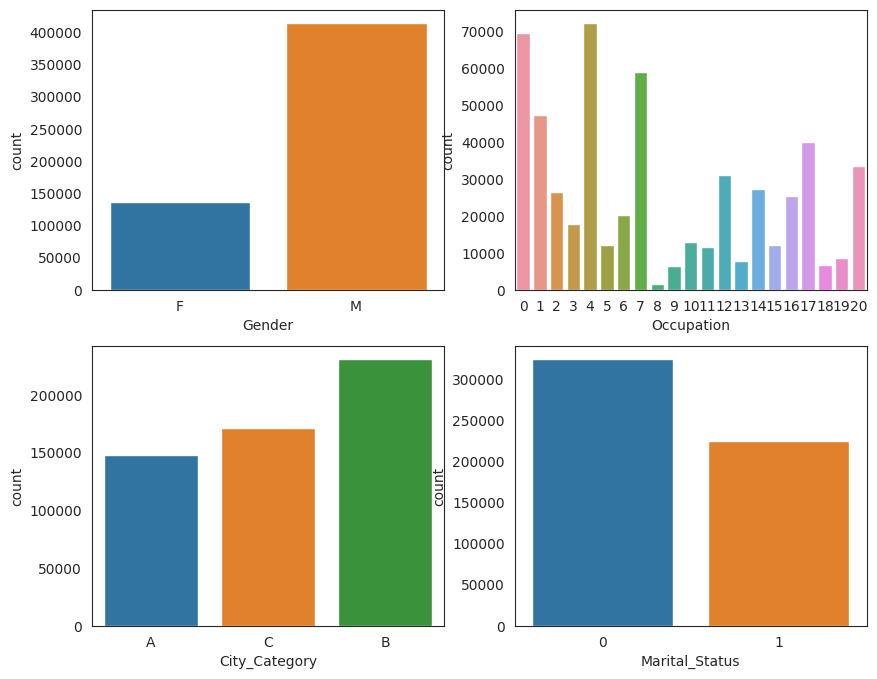

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

Observations:
Most of the customers are Male
There are 20 different types of Occupation
More customers belong to B City_Category
More customers are Single as compare to Married

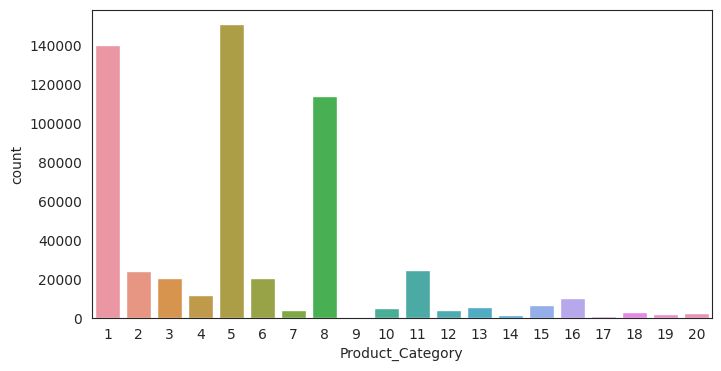

In [ ]:
#Product_Category - 1, 5, 8 have highest purchasing frequency#
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Product_Category')
plt.show()

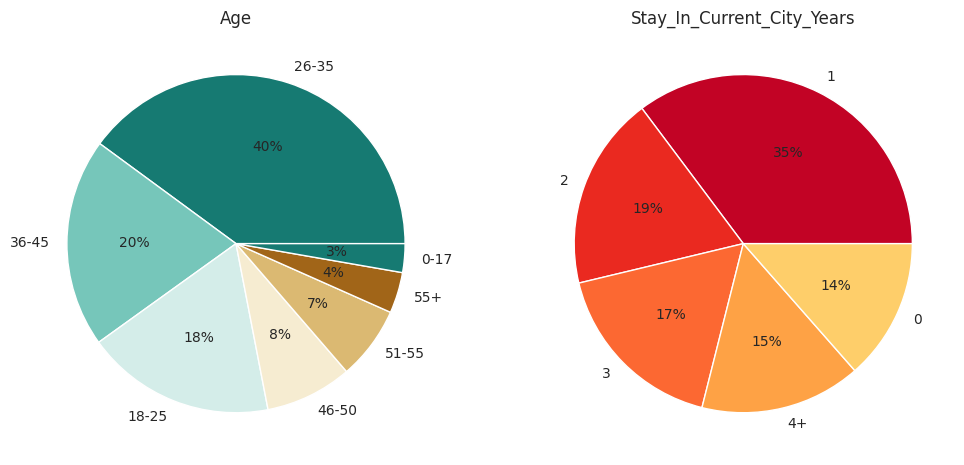

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

**BIVARIATE ANALYSIS**

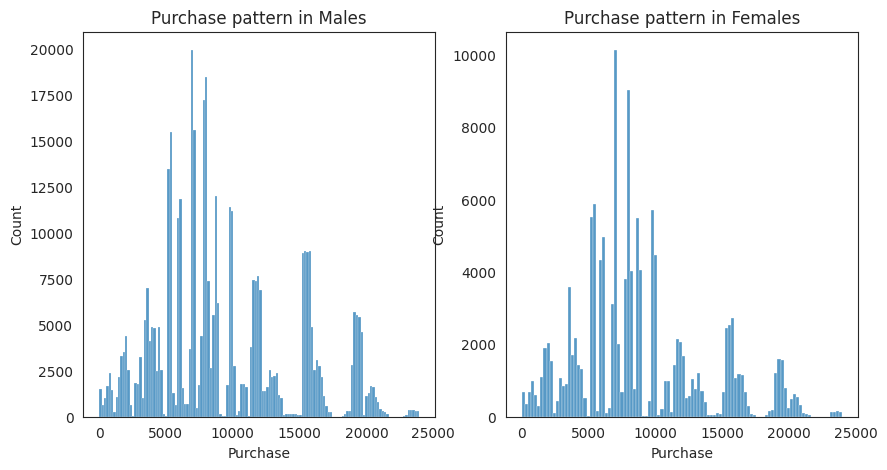

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Purchase pattern in Males")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Purchase pattern in Females")
plt.show()

From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.

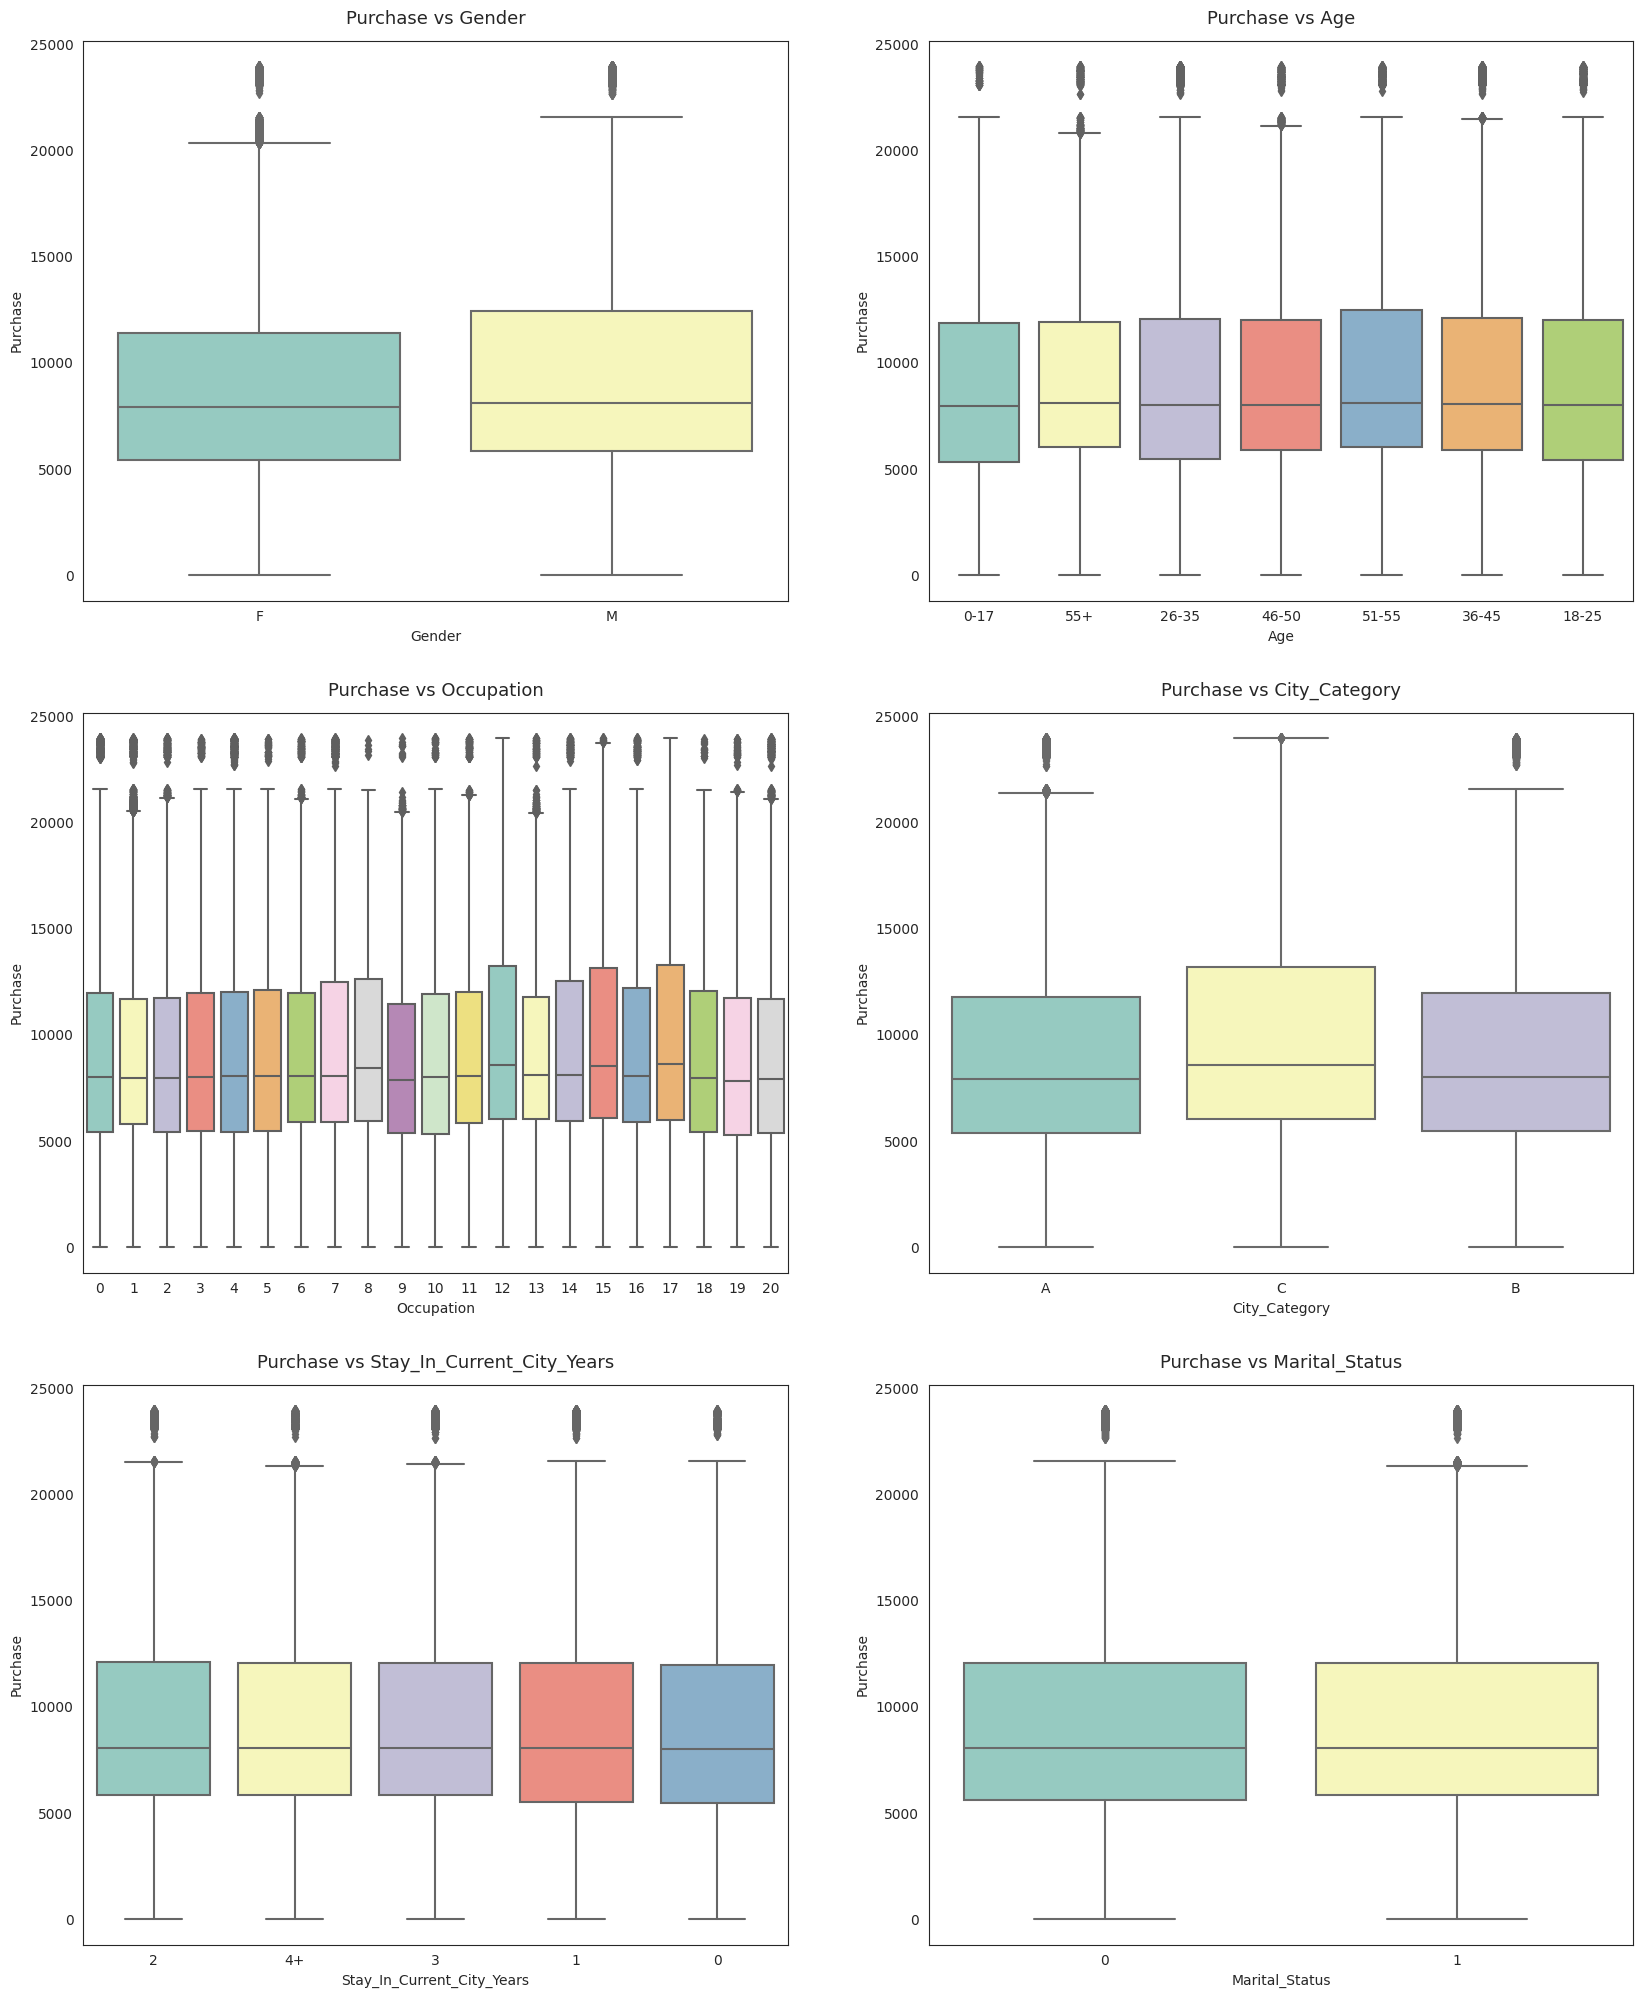

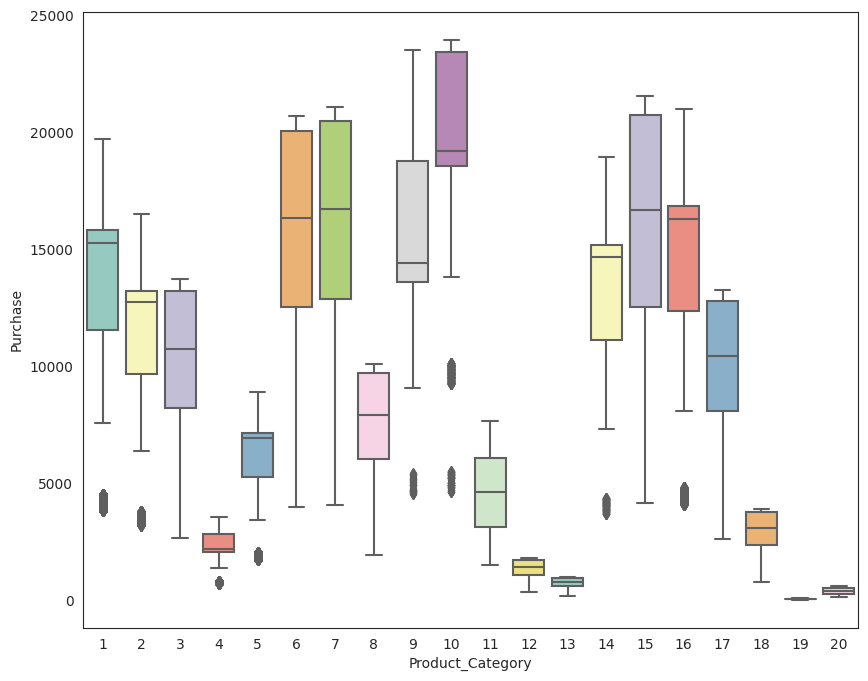

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

**Observations**

1.Spending behaviour is similar in both males and females
2. Among differnt age categories, occupations,Cities, stay in crrent city and marital status we see similar purchase behaviour. For all, most of the purchases are of the values between 5k to 12k with few outliers.
3. Product category: Product category 10 is the most expensive.

**MULTIVARIATE ANALYSIS**

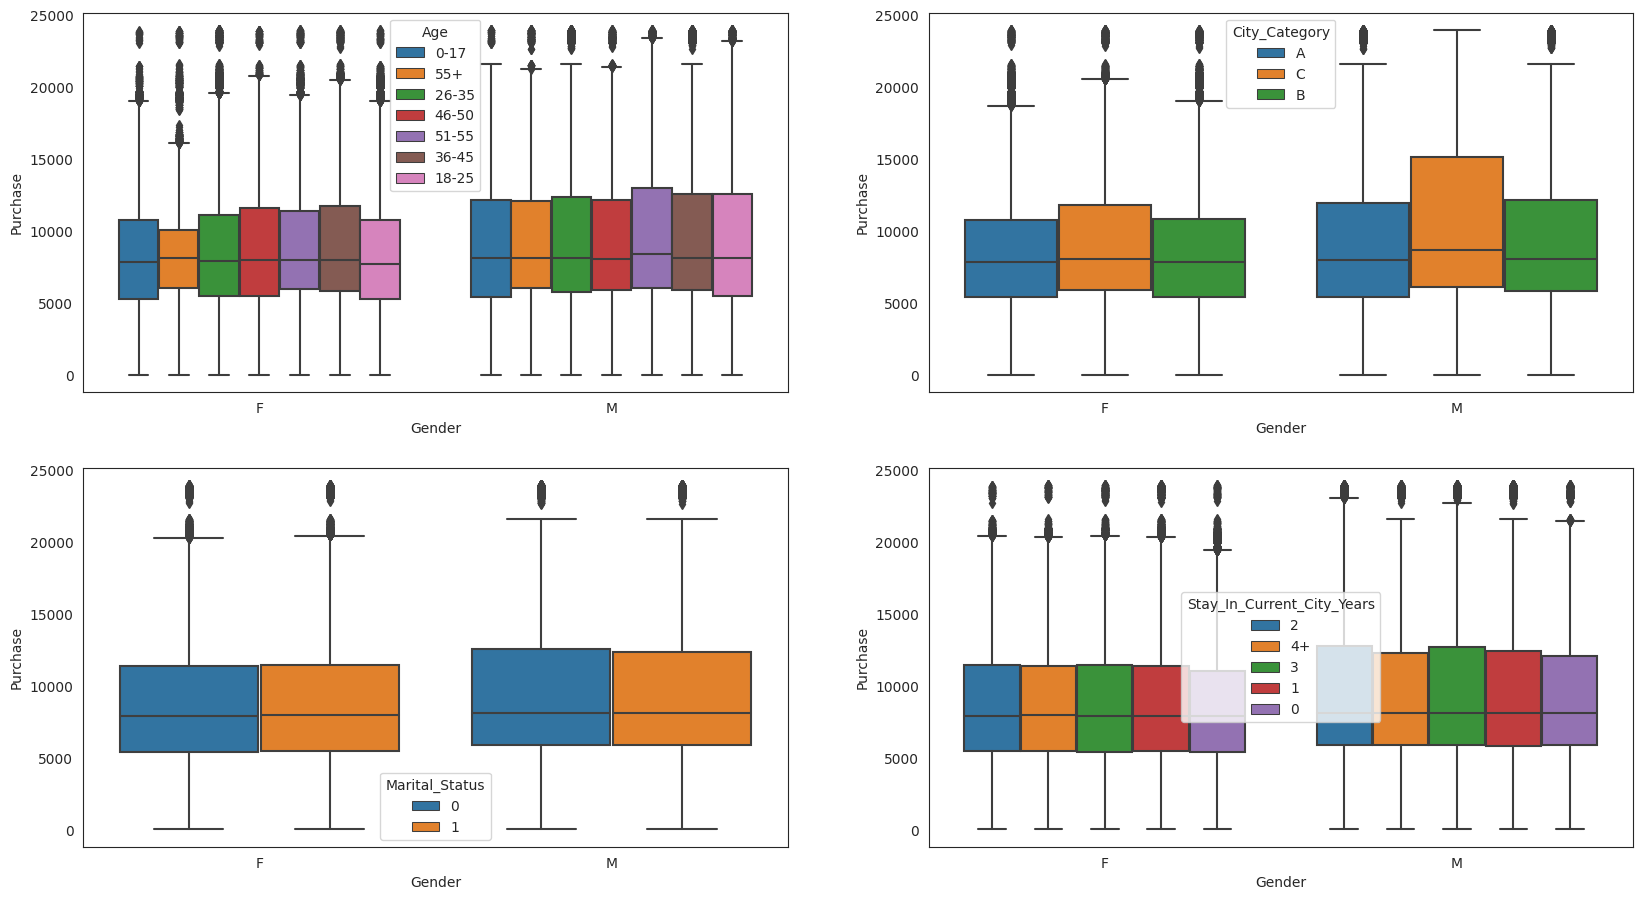

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

**Correlation between variables**

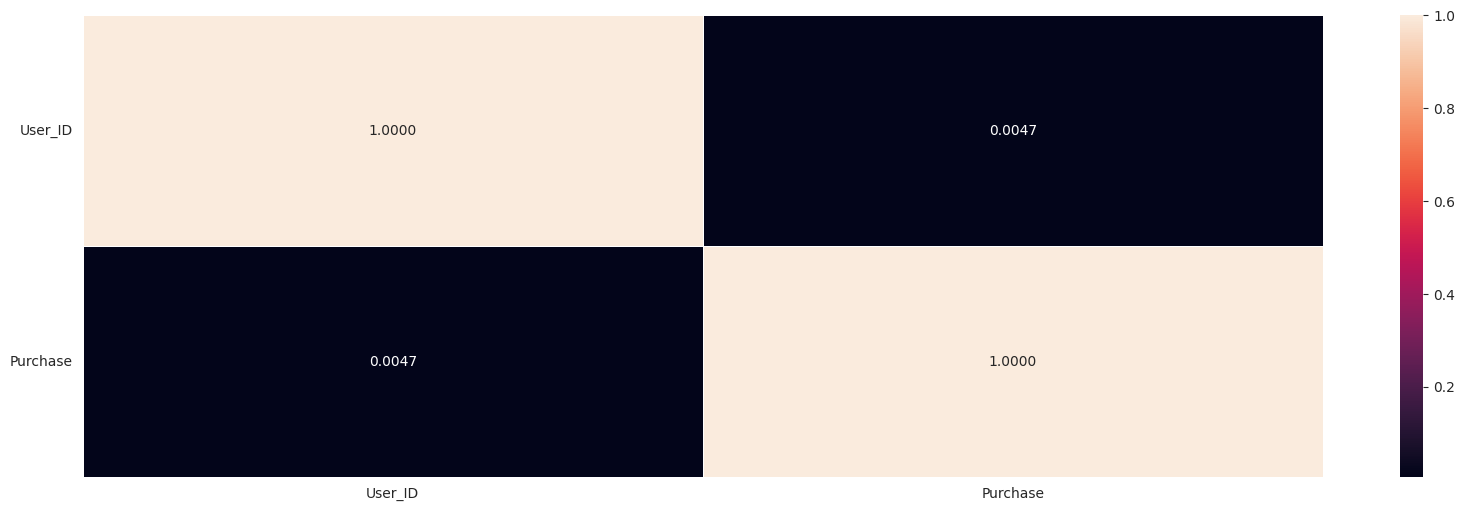

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5)
plt.yticks(rotation=0)
plt.show()

**Gender-wise average purchase amount spent**

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Average purchase among Males')

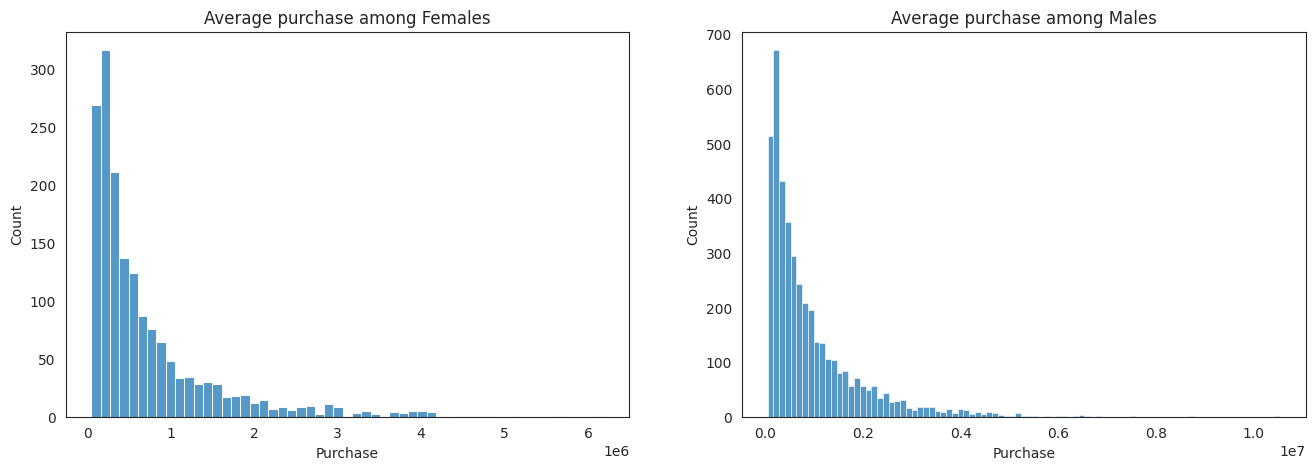

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=amt_df[amt_df['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Average purchase among Females")
sns.histplot(data=amt_df[amt_df['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Average purchase among Males")


In [ ]:
##Male customers spend more money than female customers##
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


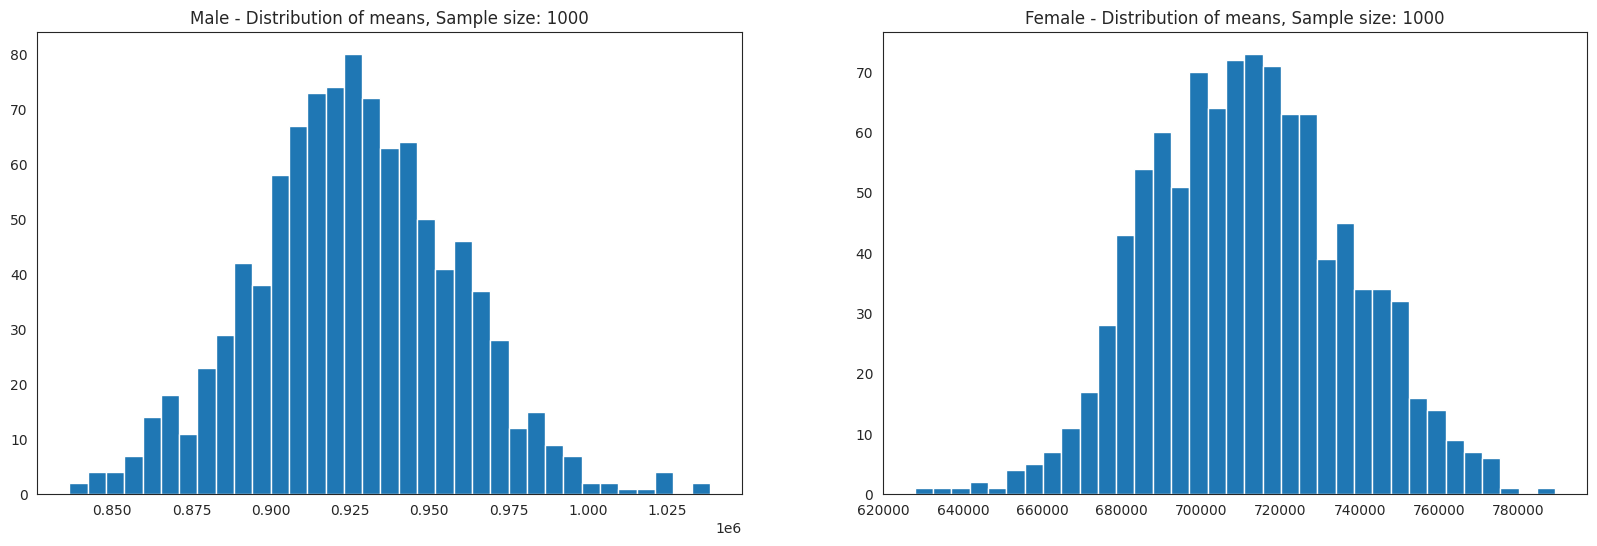

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]

sample_size = 1000
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 1000")
axis[1].set_title("Female - Distribution of means, Sample size: 1000")

plt.show()

Observation: mean of the sample means are closer to the population mean as per central limit theorem

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 926148.63
Population mean - Mean of sample means of amount spend for Female: 711888.70

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Calculating 90% confidence interval for sample size 1000: **

Average amount spend by male customers lie in the range 924355.61- 927634.81

Average amount spend by female customers lie in range 710326.797- 712966.362

In [ ]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval
print("Population avg spend amount for Male: {:.2f}".format(male_df['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_df['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 926148.63
Sample avg spend amount for Female: 711888.70

Sample std for Male: 31718.55
Sample std for Female: 24914.62

Sample std error for Male: 1003.03
Sample std error for Female: 787.87

Male_CI:  [924498.6437575015, 927798.6079544985]
Female_CI:  [710592.6576380811, 713184.7479759189]


**Calculating 95% confidence interval for sample size 1000:**

Average amount spend by male customers lie in the range 924041.64- 927948.77

Average amount spend by female customers lie in range 710074.07-713219.09

In [ ]:
print("Population avg spend amount for Male: {:.2f}".format(male_df['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_df['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 926148.63
Sample avg spend amount for Female: 711888.70

Sample std for Male: 31718.55
Sample std for Female: 24914.62

Sample std error for Male: 1003.03
Sample std error for Female: 787.87

Male_CI:  [924182.6897386401, 928114.5619733599]
Female_CI:  [710344.4787759477, 713432.9268380523]


**Calculating 99% confidence interval for sample size 1000:**

Average amount spend by male customers lie in the range
923427.66-928562.75

Average amount spend by female customers lie in range 709579.856-713713.303


In [ ]:
print("Population avg spend amount for Male: {:.2f}".format(male_df['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_df['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 926148.63
Sample avg spend amount for Female: 711888.70

Sample std for Male: 31718.55
Sample std for Female: 24914.62

Sample std error for Male: 1003.03
Sample std error for Female: 787.87

Male_CI:  [923564.8241017556, 928732.4276102444]
Female_CI:  [709859.1512233312, 713918.2543906688]


Calculating CLTs for Purchase vs married/unmarried

In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
amt_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

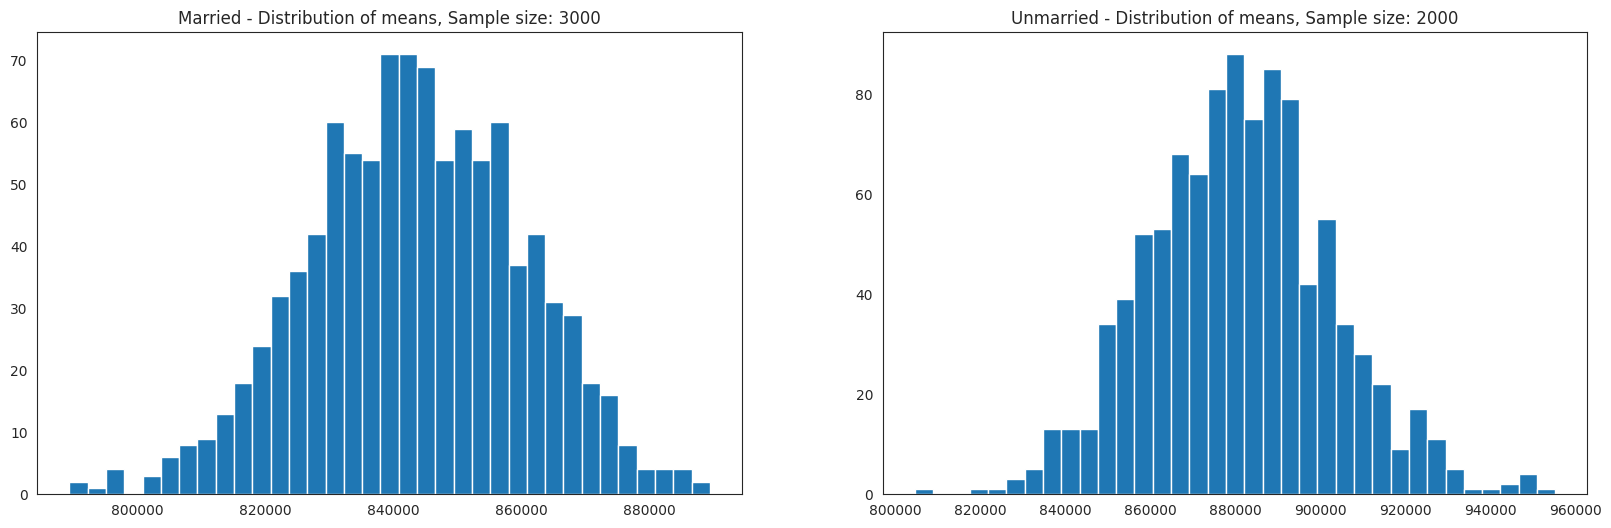

Population mean - Mean of sample means of amount spend for Married: 842806.76
Population mean - Mean of sample means of amount spend for Unmarried: 880109.27

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [ ]:
married_samp_size = 3000
unmarried_sample_size = 2000
num_repitions = 1000
married_means = []
unmarried_means = []

for _ in range(num_repitions):
    married_mean = amt_df[amt_df['Marital_Status']==1].sample(married_samp_size, replace=True)['Purchase'].mean()
    unmarried_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarried_sample_size, replace=True)['Purchase'].mean()

    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(unmarried_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

Calculating CLT for 95%

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


Calculating CLT for 90%

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.645*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (812592.43, 874461.16)
Unmarried confidence interval of means: (853857.46, 907294.11)


Calculating CLT for 99%

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 2.576*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (795084.90, 891968.69)
Unmarried confidence interval of means: (838736.02, 922415.54)


**Calculating the average amount spent by Age**

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [ ]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)



Calculating CLT for 95%

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


Calculating CLT for 90%

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.645*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (952206.28, 1027112.35)
For age 36-45 --> confidence interval of means: (832398.89, 926932.53)
For age 18-25 --> confidence interval of means: (810187.65, 899538.59)
For age 46-50 --> confidence interval of means: (726209.00, 858888.57)
For age 51-55 --> confidence interval of means: (703772.36, 822629.48)
For age 55+ --> confidence interval of means: (487032.92, 592361.57)
For age 0-17 --> confidence interval of means: (542320.46, 695415.16)


Calculating CLT for 99%

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 2.576*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (931009.46, 1048309.18)
For age 36-45 --> confidence interval of means: (805647.89, 953683.53)
For age 18-25 --> confidence interval of means: (784903.24, 924823.00)
For age 46-50 --> confidence interval of means: (688663.50, 896434.06)
For age 51-55 --> confidence interval of means: (670138.33, 856263.52)
For age 55+ --> confidence interval of means: (457227.15, 622167.34)
For age 0-17 --> confidence interval of means: (498997.92, 738737.71)


**Questions**

**1.**Are women spending more money per transaction than men? Why or Why not?

  No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women  

  The reason for less purchase by women could have several factors:

  Males might be doing the purchase for females.
  Salary can be a factor in less purchase.
  If the female based products quality/quantity needs to be improved for women purchasing.

**2.**Confidence intervals and distribution of the mean of the expenses by female and male customers.

  At 99% Confidence Interval with sample size 2000 and 3000 resp.

  Average amount spend by male customers lie in the range 923427.66-928562.75

  Average amount spend by female customers lie in range 709579.856-713713.303


**3.** Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

  No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

**4.** Results when the same activity is performed for Married vs Unmarried

  At 99% Confidence Interval with sample size 3000 and 2000 respectively

  Average amount spend by married customers lie in the range:  (795084.90, 891968.69)

  Average amount spend by unmarried customers lie in the range:  (838736.02, 922415.54)

**5.** Results when the same activity is performed for Age

  At 99% Confidence Interval with sample size 200

  For age 26-35 --> confidence interval of means: (931009.46, 1048309.18)
  For age 36-45 --> confidence interval of means: (805647.89, 953683.53)
  For age 18-25 --> confidence interval of means: (784903.24, 924823.00)
  For age 46-50 --> confidence interval of means: (688663.50, 896434.06)
  For age 51-55 --> confidence interval of means: (670138.33, 856263.52)
  For age 55+ --> confidence interval of means: (457227.15, 622167.34)
  For age 0-17 --> confidence interval of means: (498997.92, 738737.71)

**Recommendations:**

- Unmarried customers spend more money than married customers.

- Male customers spent more average money thatn Female customers and hence, company must focus more on retaining Male customers.

- The top 10-15 users who have high purchase amount can be offered company membership cards to retain them further.

- Product_Category - 1, 5, 8 have highest purchasing frequency. Company must try to increase sale of the products under this category using campaigns and sale offers

- We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

- Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

- People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

- Customers in the age 26-35 spend more money than the others and hence, company must focus on products preferred by these age groups to improve sales